In [21]:
import cv2
import dlib
import numpy as np
import requests
from matplotlib import pyplot as plt
import gdown

# Downloading the dlib shape predictor
dlibshape_url = 'https://drive.google.com/uc?id=17D3D89Gke6i5nKOvmsbPslrGg5rVgOwg'
dlibshape_path = './shape_predictor_68_face_landmarks.dat'
gdown.download(dlibshape_url, dlibshape_path, True)

print("Done")

# Initializing dlib's face detector
frontalface_detector = dlib.get_frontal_face_detector()

Done


In [22]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

In [23]:
def detect_face(image_url):
    """
    Detect faces in an image from a URL and display the image with bounding boxes.
    
    :type image_url: str
    :rtype: None
    """
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    try:
        response = requests.get(image_url, headers=headers, stream=True)
        response.raise_for_status() 
        img_array = np.array(bytearray(response.raw.read()), dtype=np.uint8)
        image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        
        if image is None:
            return "Failed to load image. Please check the URL and try again."
        
    except Exception as e:
        return f"Error loading image: {e}"
    
    # Detect faces using dlib model
    rects = frontalface_detector(image, 1)
    
    if len(rects) < 1:
        return "No Face Detected"
    
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

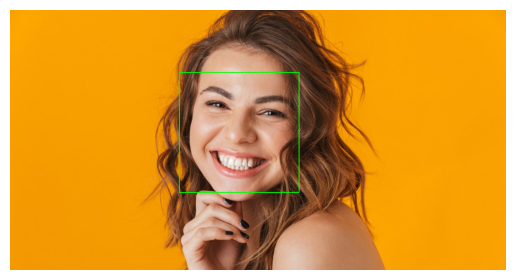

In [24]:
image_url = input('Enter the URL of the image: ')
detect_face(image_url)